In [1]:
%pip install pymongo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:

client = pymongo.MongoClient('mongodb://localhost:27017/')

db = client.get_database('sample_airbnb')
coll = db['listingsAndReviews']


doc = list(coll.find({}))
client.close()

In [5]:
df = pd.DataFrame(doc)

df.head()

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,guests_included,images,host,address,availability,review_scores,reviews,weekly_price,monthly_price,reviews_per_month
0,10006546,https://www.airbnb.com/rooms/10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Fantastic duplex apartment with three bedrooms...,"In the neighborhood of the river, you can find...",Lose yourself in the narrow streets and stairc...,Transport: • Metro station and S. Bento railwa...,We are always available to help guests. The ho...,...,6,{'picture_url': 'https://a0.muscache.com/im/pi...,"{'host_id': 51399391, 'host_url': 'https://www...","{'street': 'Porto, Porto, Portugal', 'governme...","{'availability_30': 28, 'availability_60': 47,...","{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': 58663741, 'date': 2016-01-03 05:00:00...",NaN,NaN,NaN
1,10009999,https://www.airbnb.com/rooms/10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,This charming ground floor flat is located in ...,"There´s a table in the living room now, that d...","Easy access to transport (bus, taxi, car) and ...",NaN,...,1,{'picture_url': 'https://a0.muscache.com/im/pi...,"{'host_id': 1282196, 'host_url': 'https://www....","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 0, 'availability_60': 0, '...",NaN,NaN,1492.0,4849.0,NaN
2,1001265,https://www.airbnb.com/rooms/1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,Great studio located on Ala Moana across the s...,A short distance from Honolulu's billion dolla...,You can breath ocean as well as aloha.,NaN,Honolulu does have a very good air conditioned...,"Pool, hot tub and tennis",...,1,{'picture_url': 'https://a0.muscache.com/im/pi...,"{'host_id': 5448114, 'host_url': 'https://www....","{'street': 'Honolulu, HI, United States', 'sub...","{'availability_30': 16, 'availability_60': 46,...","{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': 4765259, 'date': 2013-05-24 04:00:00,...",650.0,2150.0,NaN
3,10021707,https://www.airbnb.com/rooms/10021707,Private Room in Bushwick,Here exists a very cozy room for rent in a sha...,NaN,Here exists a very cozy room for rent in a sha...,NaN,NaN,NaN,NaN,...,1,{'picture_url': 'https://a0.muscache.com/im/pi...,"{'host_id': 11275734, 'host_url': 'https://www...","{'street': 'Brooklyn, NY, United States', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': 61050713, 'date': 2016-01-31 05:00:00...",NaN,NaN,NaN
4,10030955,https://www.airbnb.com/rooms/10030955,Apt Linda Vista Lagoa - Rio,Quarto com vista para a Lagoa Rodrigo de Freit...,NaN,Quarto com vista para a Lagoa Rodrigo de Freit...,NaN,NaN,NaN,NaN,...,1,{'picture_url': 'https://a0.muscache.com/im/pi...,"{'host_id': 51496939, 'host_url': 'https://www...","{'street': 'Rio de Janeiro, Rio de Janeiro, Br...","{'availability_30': 28, 'availability_60': 58,...",NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(5555, 42)

In [7]:
df.columns

Index(['_id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'guests_included', 'images', 'host', 'address',
       'availability', 'review_scores', 'reviews', 'weekly_price',
       'monthly_price', 'reviews_per_month'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _id                    5555 non-null   int64         
 1   listing_url            5555 non-null   object        
 2   name                   5547 non-null   object        
 3   summary                5297 non-null   object        
 4   space                  3929 non-null   object        
 5   description            5460 non-null   object        
 6   neighborhood_overview  3314 non-null   object        
 7   notes                  2475 non-null   object        
 8   transit                3323 non-null   object        
 9   access                 3102 non-null   object        
 10  interaction            3077 non-null   object        
 11  house_rules            3270 non-null   object        
 12  property_type          5555 non-null   object        
 13  roo

In [9]:
# Convert 'security_deposit' to Python float
df['security_deposit'] = df['security_deposit'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'security_deposit'
mean_security_deposit = df['security_deposit'].mean()
df['security_deposit'] = df['security_deposit'].fillna(mean_security_deposit)

# Convert 'security_deposit' to numeric (integer) type
df['security_deposit'] = df['security_deposit'].astype(int)

print(df['security_deposit'].head())

0     200
1     509
2     509
3     509
4    1000
Name: security_deposit, dtype: int32


In [10]:
# Convert 'cleaning_fee' to Python float
df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'cleaning_fee'
mean_cleaning_fee = df['cleaning_fee'].mean()
df['cleaning_fee'] = df['cleaning_fee'].fillna(mean_cleaning_fee)

# Convert 'cleaning_fee' to numeric (integer) type
df['cleaning_fee'] = df['cleaning_fee'].astype(int)

print(df['cleaning_fee'].head())

0     35
1    187
2    100
3     94
4    250
Name: cleaning_fee, dtype: int32


In [11]:
# Convert 'weekly_price' to Python float
df['weekly_price'] = df['weekly_price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'weekly_price'
mean_weekly_price = df['weekly_price'].mean()
df['weekly_price'] = df['weekly_price'].fillna(mean_weekly_price)

# Convert 'weekly_price' to numeric (integer) type
df['weekly_price'] = df['weekly_price'].astype(int)

print(df['weekly_price'].head())

0    1530
1    1492
2     650
3    1530
4    1530
Name: weekly_price, dtype: int32


In [12]:
# Convert 'monthly_price' to Python float
df['monthly_price'] = df['monthly_price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'monthly_price'
mean_monthly_price = df['monthly_price'].mean()
df['monthly_price'] = df['monthly_price'].fillna(mean_monthly_price)

# Convert 'monthly_price' to numeric (integer) type
df['monthly_price'] = df['monthly_price'].astype(int)

print(df['monthly_price'].head())

0    5391
1    4849
2    2150
3    5391
4    5391
Name: monthly_price, dtype: int32


In [13]:
# Convert 'bedrooms' to Python float
df['bedrooms'] = df['bedrooms'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'bedrooms'
median_bedrooms = df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].fillna(median_bedrooms)

# Convert 'bedrooms' to numeric (integer) type
df['bedrooms'] = df['bedrooms'].astype(int)

df['bedrooms'] = df['bedrooms'].astype(str)

print(df['bedrooms'].head())

0    3
1    1
2    1
3    1
4    1
Name: bedrooms, dtype: object


In [14]:
# Convert 'beds' to Python float
df['beds'] = df['beds'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'beds'
median_beds = df['beds'].median()
df['beds'] = df['beds'].fillna(median_beds)

# Convert 'beds' to numeric (integer) type
df['beds'] = df['beds'].astype(int)

df['beds'] = df['beds'].astype(str)

print(df['beds'].head())

0    5
1    2
2    1
3    1
4    1
Name: beds, dtype: object


In [15]:
# Convert 'bathrooms' to Python float
df['bathrooms'] = df['bathrooms'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'bathrooms'
median_bathrooms = df['bathrooms'].median()
df['bathrooms'] = df['bathrooms'].fillna(median_bathrooms)

# Convert 'bathrooms' to numeric (integer) type
df['bathrooms'] = df['bathrooms'].astype(int)

df['bathrooms'] = df['bathrooms'].astype(str)

print(df['bathrooms'].head())

0    1
1    1
2    1
3    1
4    2
Name: bathrooms, dtype: object


In [16]:
# Convert 'minimum_nights' to Python float
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'minimum_nights' to numeric (integer) type
df['minimum_nights'] = df['minimum_nights'].astype(int)

print(df['minimum_nights'].head())

0     2
1     2
2     3
3    14
4     1
Name: minimum_nights, dtype: int32


In [17]:
# Convert 'maximum_nights' to Python float
df['maximum_nights'] = df['maximum_nights'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'maximum_nights' to numeric (integer) type
df['maximum_nights'] = df['maximum_nights'].astype(int)

print(df['maximum_nights'].head())

0      30
1    1125
2     365
3    1125
4    1125
Name: maximum_nights, dtype: int32


In [18]:
# Convert 'price' to Python float
df['price'] = df['price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'price' to numeric (integer) type
df['price'] = df['price'].astype(int)

df['price'] = df['price'].astype(str)

print(df['price'].head())

0     80
1    317
2    115
3     40
4    701
Name: price, dtype: object


In [19]:
df.isnull().sum()

_id                         0
listing_url                 0
name                        8
summary                   258
space                    1626
description                95
neighborhood_overview    2241
notes                    3080
transit                  2232
access                   2453
interaction              2478
house_rules              2285
property_type               0
room_type                   0
bed_type                    0
minimum_nights              0
maximum_nights              0
cancellation_policy         0
last_scraped                0
calendar_last_scraped       0
first_review             1388
last_review              1388
accommodates                0
bedrooms                    0
beds                        0
number_of_reviews           0
bathrooms                   0
amenities                  30
price                       0
security_deposit            0
cleaning_fee                0
extra_people                0
guests_included             0
images    

In [20]:
# Convert 'extra_people' to Python float
df['extra_people'] = df['extra_people'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'price' to numeric (integer) type
df['extra_people'] = df['extra_people'].astype(int)

df['extra_people'] = df['extra_people'].astype(str)

print(df['extra_people'].head())

0    15
1     0
2     0
3     0
4     0
Name: extra_people, dtype: object


In [21]:
# Convert 'guests_included' to Python float
df['guests_included'] = df['guests_included'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'guests_included' to numeric (integer) type
df['guests_included'] = df['guests_included'].astype(int)

df['guests_included'] = df['guests_included'].astype(str)

print(df['guests_included'].head())

0    6
1    1
2    1
3    1
4    1
Name: guests_included, dtype: object


In [22]:
# Extract latitude and longitude from the 'address' column
df['latitude'] = df['address'].apply(lambda x: x.get('location', {}).get('coordinates', [None, None])[1])
df['longitude'] = df['address'].apply(lambda x: x.get('location', {}).get('coordinates', [None, None])[0])

# Convert latitude and longitude to float data type
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].astype(float)

# Print the DataFrame to verify the changes
print(df.head())

        _id                            listing_url  \
0  10006546  https://www.airbnb.com/rooms/10006546   
1  10009999  https://www.airbnb.com/rooms/10009999   
2   1001265   https://www.airbnb.com/rooms/1001265   
3  10021707  https://www.airbnb.com/rooms/10021707   
4  10030955  https://www.airbnb.com/rooms/10030955   

                               name  \
0           Ribeira Charming Duplex   
1      Horto flat with small garden   
2  Ocean View Waikiki Marina w/prkg   
3          Private Room in Bushwick   
4       Apt Linda Vista Lagoa - Rio   

                                             summary  \
0  Fantastic duplex apartment with three bedrooms...   
1  One bedroom + sofa-bed in quiet and bucolic ne...   
2  A short distance from Honolulu's billion dolla...   
3  Here exists a very cozy room for rent in a sha...   
4  Quarto com vista para a Lagoa Rodrigo de Freit...   

                                               space  \
0  Privileged views of the Douro River and Ribe

In [23]:
# Extract country and country_code from the 'address' column
df['country'] = df['address'].apply(lambda x: x.get('country', None))
df['country_code'] = df['address'].apply(lambda x: x.get('country_code', None))

# Print the DataFrame to verify the changes
print(df.head())

        _id                            listing_url  \
0  10006546  https://www.airbnb.com/rooms/10006546   
1  10009999  https://www.airbnb.com/rooms/10009999   
2   1001265   https://www.airbnb.com/rooms/1001265   
3  10021707  https://www.airbnb.com/rooms/10021707   
4  10030955  https://www.airbnb.com/rooms/10030955   

                               name  \
0           Ribeira Charming Duplex   
1      Horto flat with small garden   
2  Ocean View Waikiki Marina w/prkg   
3          Private Room in Bushwick   
4       Apt Linda Vista Lagoa - Rio   

                                             summary  \
0  Fantastic duplex apartment with three bedrooms...   
1  One bedroom + sofa-bed in quiet and bucolic ne...   
2  A short distance from Honolulu's billion dolla...   
3  Here exists a very cozy room for rent in a sha...   
4  Quarto com vista para a Lagoa Rodrigo de Freit...   

                                               space  \
0  Privileged views of the Douro River and Ribe

In [28]:
#Extract review_rating safely
df['review_rating'] = df['review_scores'].apply(lambda x: x['review_scores_rating'] if isinstance(x, dict) and 'review_scores_rating' in x else None)

# Convert 'review_rating' to numeric (integer) type, handling NaN values
df['review_rating'] = pd.to_numeric(df['review_rating'], errors='coerce')

# Fill NaN values with a default value (e.g., -1) or any other appropriate value
df['review_rating'].fillna(-1, inplace=True)

# Convert 'review_rating' to integers
df['review_rating'] = df['review_rating'].astype(int)

# Convert 'review_rating' to string if needed
df['review_rating'] = df['review_rating'].astype(str)

# Print the DataFrame to verify the changes
print(df.head())

        _id                            listing_url  \
0  10006546  https://www.airbnb.com/rooms/10006546   
1  10009999  https://www.airbnb.com/rooms/10009999   
2   1001265   https://www.airbnb.com/rooms/1001265   
3  10021707  https://www.airbnb.com/rooms/10021707   
4  10030955  https://www.airbnb.com/rooms/10030955   

                               name  \
0           Ribeira Charming Duplex   
1      Horto flat with small garden   
2  Ocean View Waikiki Marina w/prkg   
3          Private Room in Bushwick   
4       Apt Linda Vista Lagoa - Rio   

                                             summary  \
0  Fantastic duplex apartment with three bedrooms...   
1  One bedroom + sofa-bed in quiet and bucolic ne...   
2  A short distance from Honolulu's billion dolla...   
3  Here exists a very cozy room for rent in a sha...   
4  Quarto com vista para a Lagoa Rodrigo de Freit...   

                                               space  \
0  Privileged views of the Douro River and Ribe

In [29]:
columns_to_drop = [
    'listing_url', 'space', 'neighborhood_overview', 'notes', 'transit',
    'access', 'interaction', 'house_rules', 'bed_type', 'cancellation_policy',
    'first_review', 'last_review', 'images', 'host', 'reviews', 'reviews_per_month'
]

# Drop only the existing columns
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(columns=columns_to_drop_existing, axis=1, inplace=True)

In [30]:
df.shape

(5555, 31)

In [31]:
df.columns

Index(['_id', 'name', 'summary', 'description', 'property_type', 'room_type',
       'minimum_nights', 'maximum_nights', 'last_scraped',
       'calendar_last_scraped', 'accommodates', 'bedrooms', 'beds',
       'number_of_reviews', 'bathrooms', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'guests_included',
       'address', 'availability', 'review_scores', 'weekly_price',
       'monthly_price', 'latitude', 'longitude', 'country', 'country_code',
       'review_rating'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   _id                    5555 non-null   int64         
 1   name                   5547 non-null   object        
 2   summary                5297 non-null   object        
 3   description            5460 non-null   object        
 4   property_type          5555 non-null   object        
 5   room_type              5555 non-null   object        
 6   minimum_nights         5555 non-null   int32         
 7   maximum_nights         5555 non-null   int32         
 8   last_scraped           5555 non-null   datetime64[ns]
 9   calendar_last_scraped  5555 non-null   datetime64[ns]
 10  accommodates           5555 non-null   int64         
 11  bedrooms               5555 non-null   object        
 12  beds                   5555 non-null   object        
 13  num

In [33]:
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                _id  minimum_nights  maximum_nights  \
count  5.555000e+03     5555.000000    5.555000e+03   
mean   1.664386e+07        5.564356    1.382776e+06   
min    1.170800e+04        1.000000    1.000000e+00   
25%    8.376039e+06        1.000000    5.900000e+01   
50%    1.711345e+07        2.000000    1.125000e+03   
75%    2.461229e+07        3.000000    1.125000e+03   
max    3.295874e+07     1250.000000    2.147484e+09   
std    9.622558e+06       22.613861    5.256920e+07   

                        last_scraped          calendar_last_scraped  \
count                           5555                           5555   
mean   2019-03-01 12:48:43.420342016  2019-03-01 12:48:43.420342016   
min              2019-02-11 05:00:00            2019-02-11 05:00:00   
25%              2019-02-18 05:00:00            2019-02-18 05:00:00   
50%              2019-03-07 05:00:00            2019-03-07 05:00:00   
75%              2019-03-08 05:00:00            2019-03-08

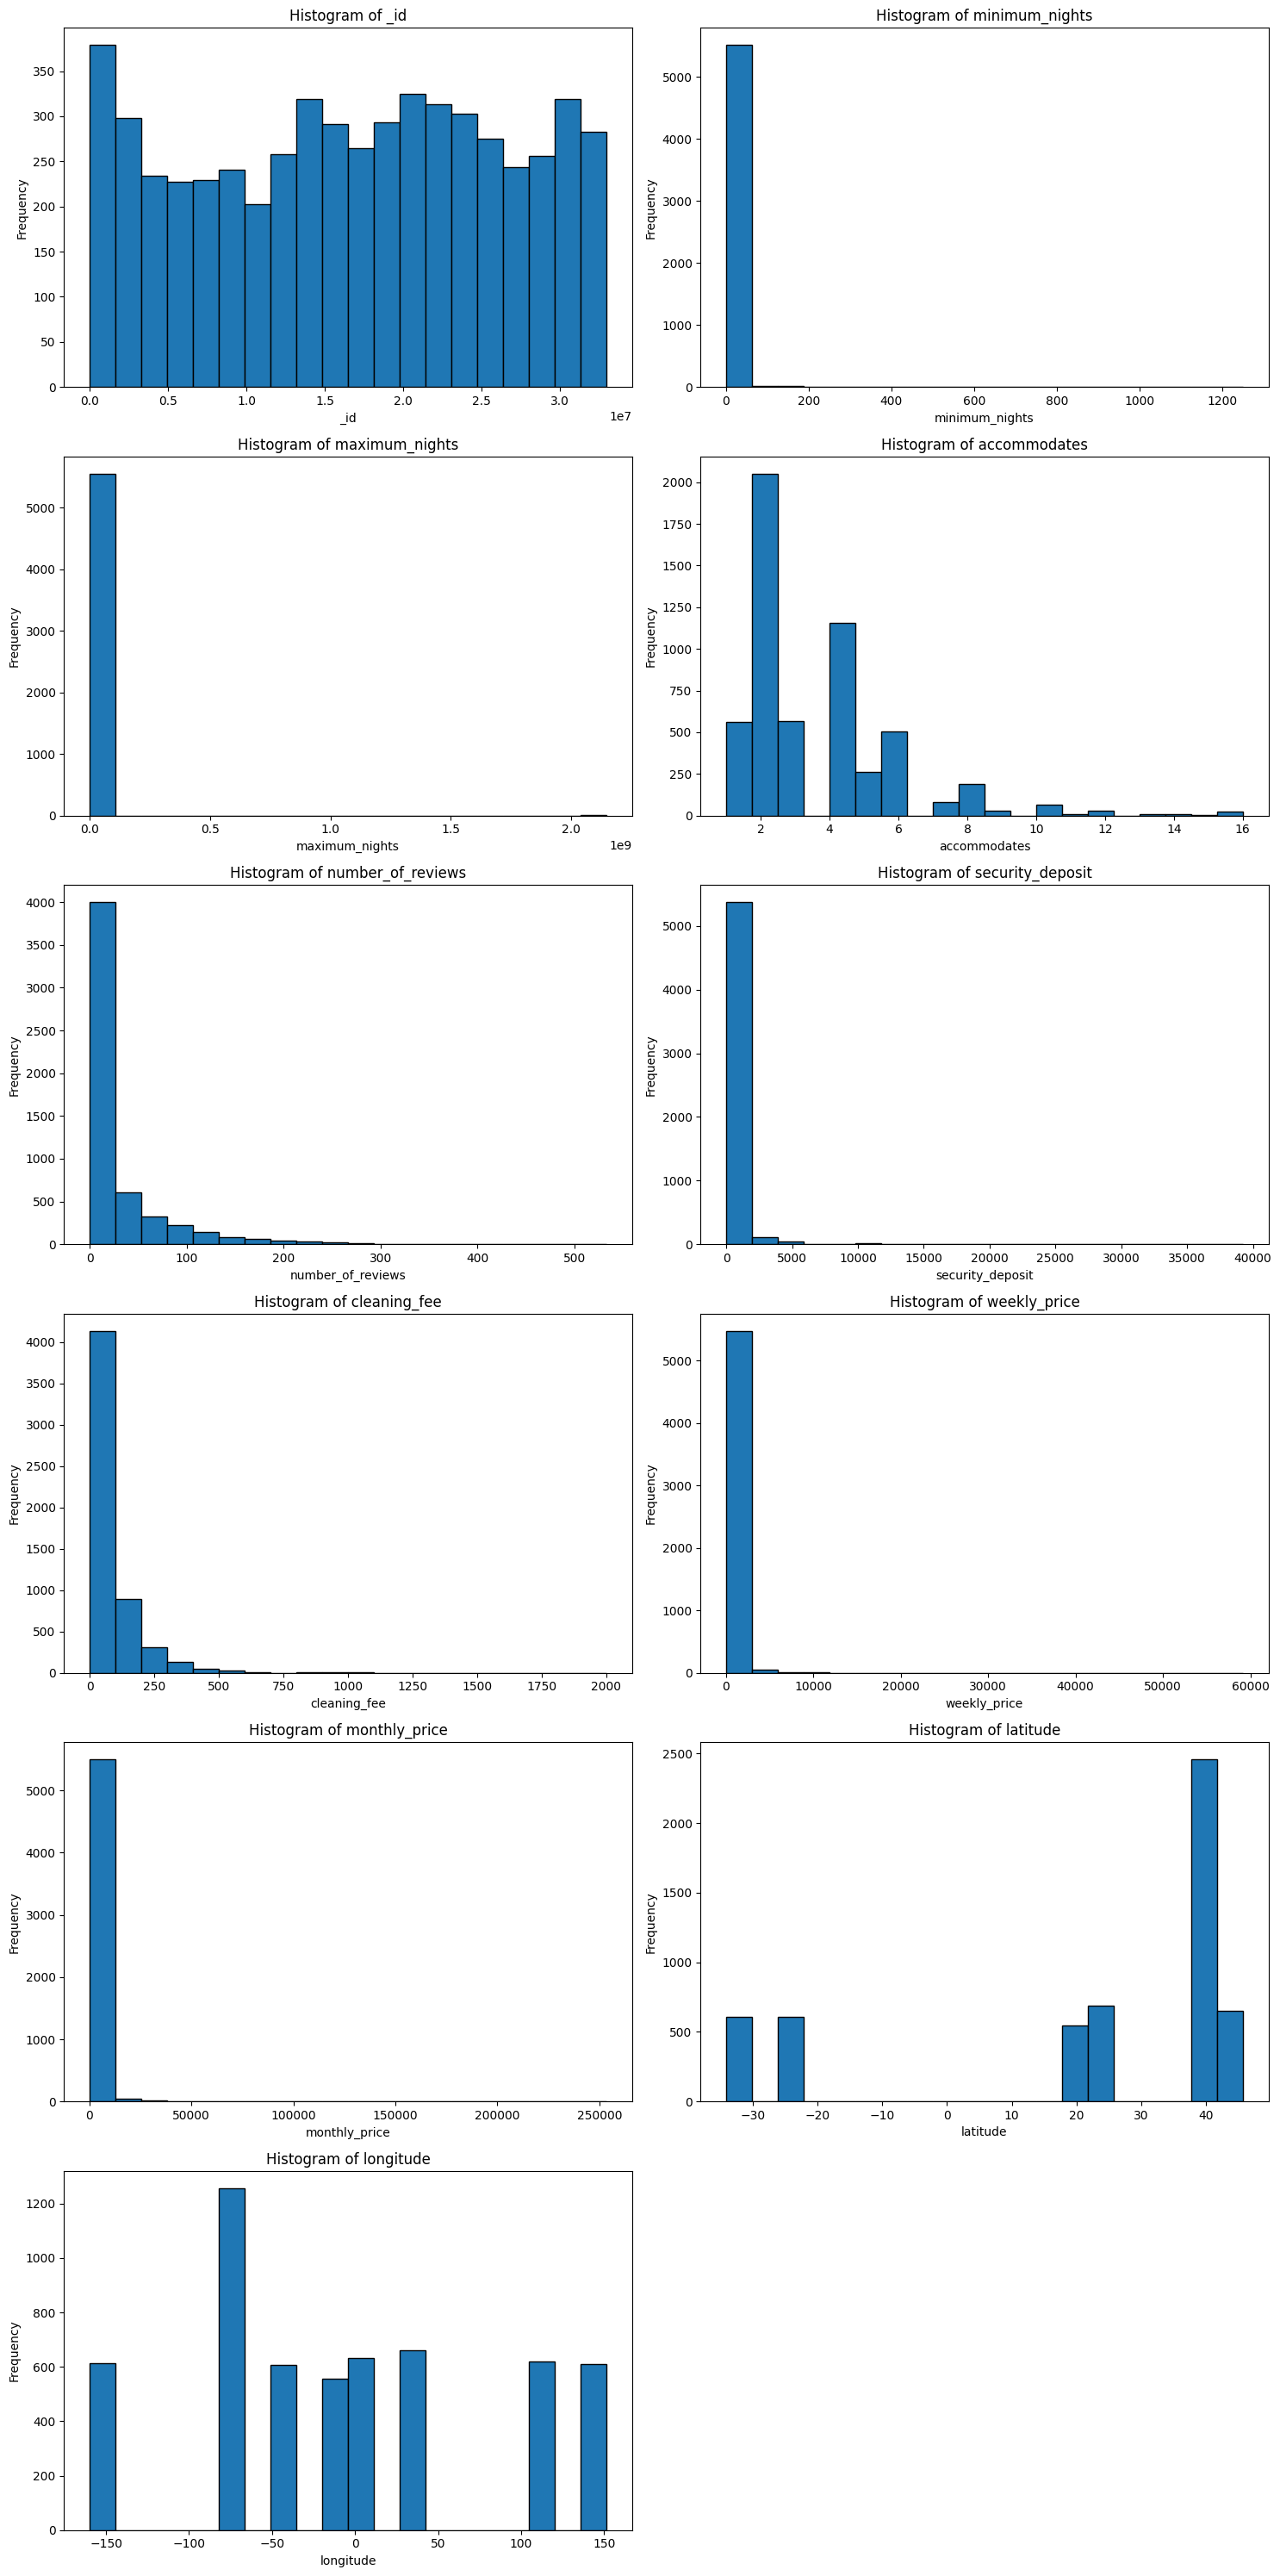

In [34]:
# Plot histogram for all numerical columns using subplots
import math

numerical_columns = df.select_dtypes(include='number').columns

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = int(math.ceil(num_cols / 2))  # Assuming 2 columns per row

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten axes if num_cols is odd
if num_cols % 2 != 0:
    axes[-1, -1].axis('off')

# Plot histograms
for i, col in enumerate(numerical_columns):
    row_idx = i // 2
    col_idx = i % 2

    axes[row_idx, col_idx].hist(df[col], bins=20, edgecolor='black')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

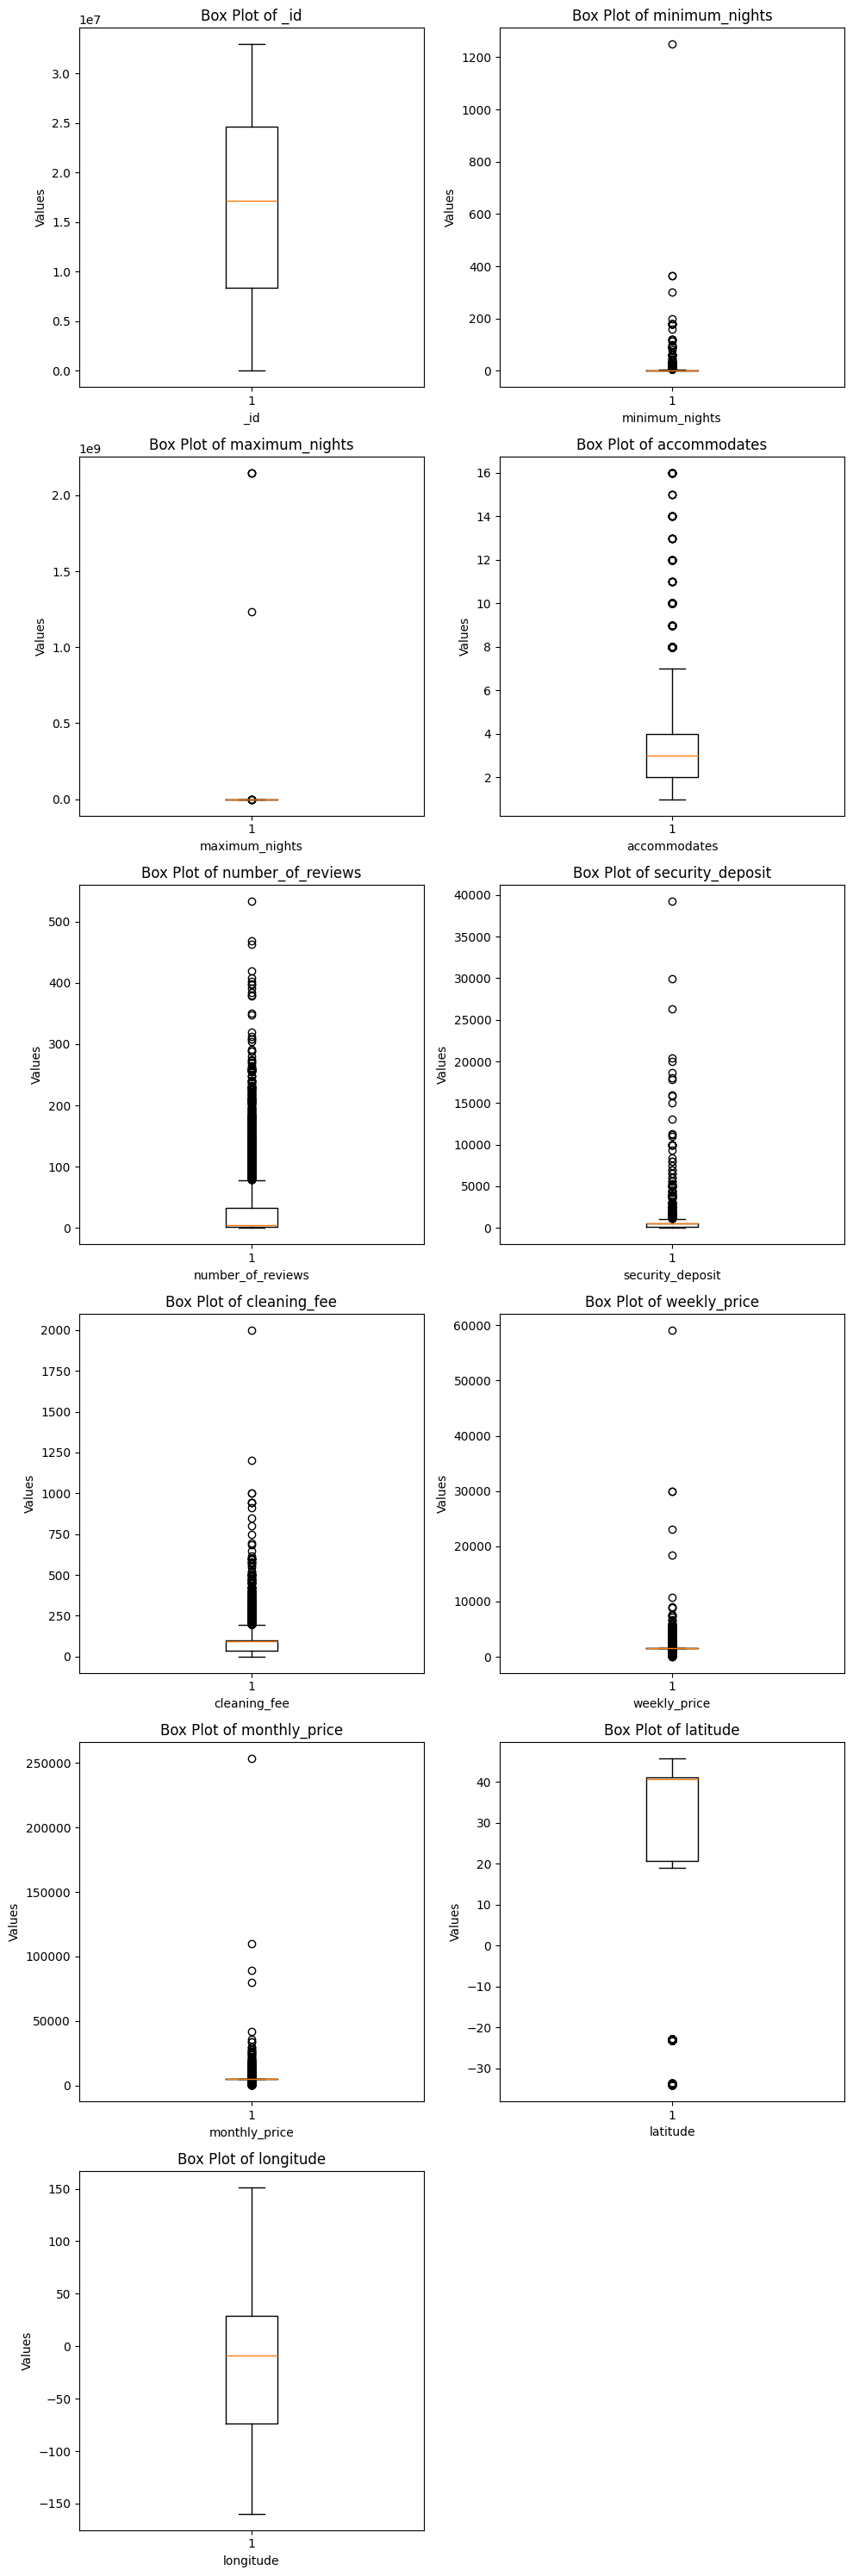

In [35]:
# Plot box plot for all numerical columns using subplots

numerical_columns = df.select_dtypes(include='number').columns

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = int(math.ceil(num_cols / 2))  # Assuming 2 columns per row

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Flatten axes if num_cols is odd
if num_cols % 2 != 0:
    axes[-1, -1].axis('off')

# Plot boxplots
for i, col in enumerate(numerical_columns):
    row_idx = i // 2
    col_idx = i % 2

    axes[row_idx, col_idx].boxplot(df[col])
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Values')
    axes[row_idx, col_idx].set_title(f'Box Plot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

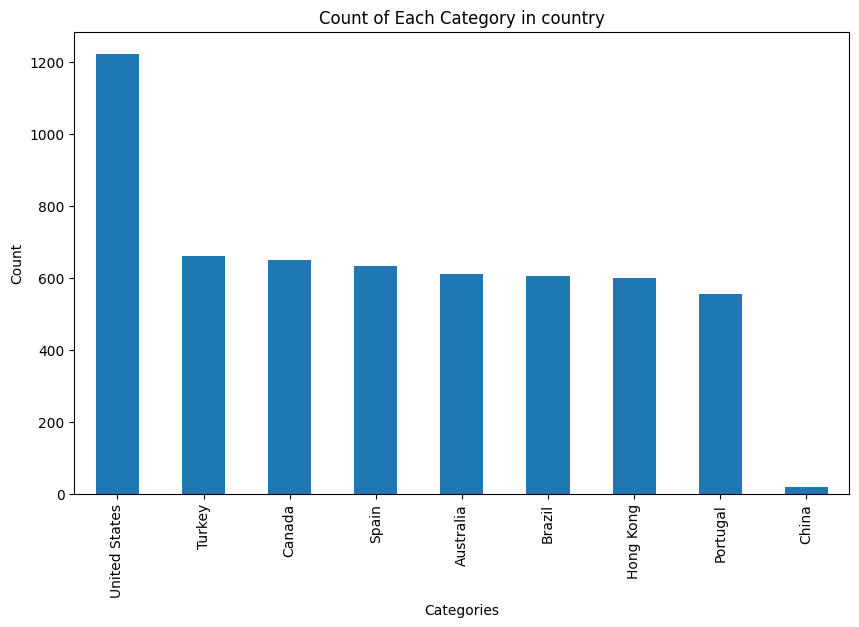

In [36]:
# Specify the categorical columns you want to plot
categorical_columns_of_interest = ['country']  # Add your column names

# Plot count plot for the specified categorical columns
for col in categorical_columns_of_interest:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title(f'Count of Each Category in {col}')
    plt.show()

In [37]:
df.to_csv('cleaned_airbnb_data.csv', index=False)